# Least square method

In [4]:
import time
import numpy as np
import scipy
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from functools import wraps
%matplotlib inline

In [5]:
# Object function
def real_func(x):
    # return 2.6*x+0.8
    return np.sin(2*np.pi*x)

# Polynomial
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret = fit_func(p,x) - y
    return ret

In [6]:
def timeit(f):
    @wraps(f)
    def timed(*args,**kw):
        ts = time.time()
        result = f(*args,**kw)
        te = time.time()

        print('func:%r args:[%r,%r] took:%2.4f sec'%(f.__name__,args,kw,te-ts))
        return result
    return timed

In [7]:
x = np.linspace(0,1,10)
x_points = np.linspace(0,1,1000)
y_ = real_func(x)
y = [np.random.normal(0,0.1) + y1 for y1 in y_]

In [8]:
@timeit
def fitting(M=0):
    """
    M is polynomial coefficient 
    """
    #随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # least square method
    p_lsq = leastsq(residuals_func,p_init,args=(x,y))
    print("Fitting Parameters: ", p_lsq[0])

    #Visualizing
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted curve')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()

    return p_lsq


Fitting Parameters:  [0.02789175]
func:'fitting' args:[(),{'M': 0}] took:0.0430 sec
fitting


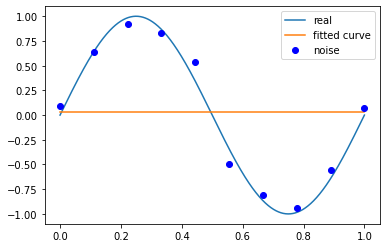

In [9]:
# M=0
p_lsq_0 = fitting(M=0)
print(fitting.__name__)

Fitting Parameters:  [-1.29302078  0.67440214]
func:'fitting' args:[(),{'M': 1}] took:0.0280 sec


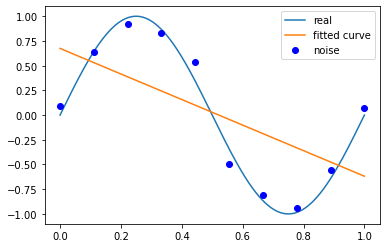

In [10]:
# M=1
p_lsq_0 = fitting(M=1)

func:'calculate' args:[(),{}] took:0.0260 sec
(-1.2930207816382946, 0.6744021410991182)


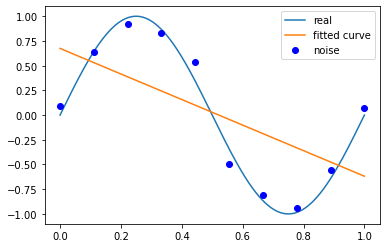

In [11]:
@timeit
def calculate():
    numerator = 0
    denominator1 = 0
    denominator2 = 0
    for i in range(len(x)):
        numerator = numerator + y[i]*(x[i]-x.mean())
        denominator1 = denominator1 + x[i]*x[i]
        denominator2 = denominator2 + x[i]
    w = numerator / (denominator1 -denominator2*denominator2/len(x) ) 
    b=0
    for i in range(len(x)):
        b = y[i]-w*x[i]+b
    b = b/len(x)

    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_func([w,b],x_points),label='fitted curve')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()

    return w,b

print(calculate())

In [12]:
# @timeit
# def np_calculate():
xn = np.array(x)
xmean = xn.mean()
print(xmean,xn)
xd = xn-xmean
print(xd)
xn = xn.transpose()
print(xn.shape)
yn = np.array(y)
yd = yn-yn.mean()
w = np.dot(xd,yd) / np.dot(xd,xd)
print(w)

0.5 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
  0.16666667  0.27777778  0.38888889  0.5       ]
(10,)
-1.2930207816382944


Fitting Parameters:  [-5.12817843e+04  2.30457205e+05 -4.34307265e+05  4.45444922e+05
 -2.69852954e+05  9.79745347e+04 -2.05883747e+04  2.24394484e+03
 -9.02455413e+01  8.73011441e-02]
func:'fitting' args:[(),{'M': 9}] took:0.0610 sec


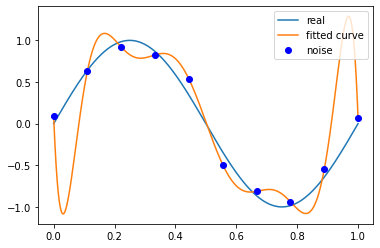

In [16]:
# M=9
p_lsq_9 = fitting(M=9)

In [43]:
regularization = .0000000001

def residuals_func_regularization(p,x,y):
    ret = fit_func(p,x) - y
    print("ret1： ",ret)
    ret = np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    print("ret2: ",ret)
    return ret

In [44]:
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

ret1：  [0.83510295 0.36538735 0.16872969 0.36089721 0.77813504 1.99429041
 2.6398963  3.38461772 4.2226388  6.01296229]
ret2:  [8.35102953e-01 3.65387348e-01 1.68729692e-01 3.60897214e-01
 7.78135039e-01 1.99429041e+00 2.63989630e+00 3.38461772e+00
 4.22263880e+00 6.01296229e+00 5.97721643e-06 4.41684470e-06
 5.84765315e-06 6.21712681e-06 4.87024804e-06 1.66297756e-06
 1.44913801e-06 1.12617454e-06 4.91754103e-06 6.52238192e-06]
ret1：  [0.83510295 0.36538735 0.16872969 0.36089721 0.77813504 1.99429041
 2.6398963  3.38461772 4.2226388  6.01296229]
ret2:  [8.35102953e-01 3.65387348e-01 1.68729692e-01 3.60897214e-01
 7.78135039e-01 1.99429041e+00 2.63989630e+00 3.38461772e+00
 4.22263880e+00 6.01296229e+00 5.97721643e-06 4.41684470e-06
 5.84765315e-06 6.21712681e-06 4.87024804e-06 1.66297756e-06
 1.44913801e-06 1.12617454e-06 4.91754103e-06 6.52238192e-06]
ret1：  [0.83510295 0.36538735 0.16872969 0.36089721 0.77813504 1.99429041
 2.6398963  3.38461772 4.2226388  6.01296229]
ret2:  [8.3510

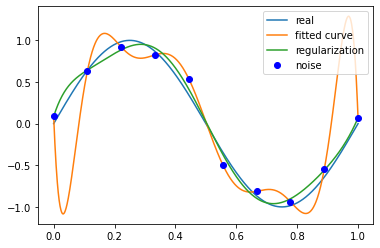

In [45]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()